iterazione 1 | w0: 0.000 b0: 0.000 | w_gradient:-34.522  b_gradient:-5.913 | loss:14.956521739130435
iterazione 2 | w0: 0.345 b0: 0.059 | w_gradient:-17.975  b_gradient:-3.303 | loss:5.622678425248624
iterazione 3 | w0: 0.525 b0: 0.092 | w_gradient:-9.343  b_gradient:-1.940 | loss:3.080923326313416
iterazione 4 | w0: 0.618 b0: 0.112 | w_gradient:-4.840  b_gradient:-1.227 | loss:2.3876476222509924
iterazione 5 | w0: 0.667 b0: 0.124 | w_gradient:-2.491  b_gradient:-0.853 | loss:2.197458188355973
iterazione 6 | w0: 0.692 b0: 0.132 | w_gradient:-1.267  b_gradient:-0.656 | loss:2.1442086817437582
iterazione 7 | w0: 0.704 b0: 0.139 | w_gradient:-0.628  b_gradient:-0.551 | loss:2.1282527031939114
iterazione 8 | w0: 0.711 b0: 0.144 | w_gradient:-0.295  b_gradient:-0.495 | loss:2.122471255922324
iterazione 9 | w0: 0.714 b0: 0.149 | w_gradient:-0.121  b_gradient:-0.464 | loss:2.119483529544862
iterazione 10 | w0: 0.715 b0: 0.154 | w_gradient:-0.031  b_gradient:-0.446 | loss:2.1172804267076972
it

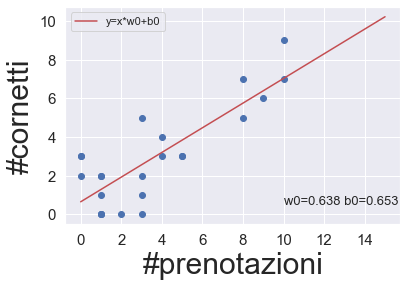

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def prediction(X,w,b): 
    return X*w+b

def loss(X,Y,w,b):
    error=prediction(X,w,b) - Y
    squared_error = error**2
    return np.average(squared_error)

def gradient(X, Y, w, b):
    w_gradient = 2 * np.average(X * (prediction(X, w, b) - Y))
    b_gradient = 2 * np.average(prediction(X, w, b) - Y)
    return (w_gradient, b_gradient)


def training(X,Y,iteration,learning_rate):
    w=0,b=0
    for i in range(iteration):
        current_loss = loss(X,Y,w,b)
        w_gradient,b_gradient=gradient(X,Y,w,b)
        w-=w_gradient*learning_rate
        b-=b_gradient*learning_rate
    return w,b
        
# carico il training set 
X,Y = np.loadtxt("../cornetti.txt",skiprows=1,unpack=True)

# avvio il training
w0,b0= training(X,Y,10000,0.01)
print(f"\nRISULTATO DEL TRAINING:")
print(f"w0:{w0:2.3} + b0:{b0:2.3}")

# disegno il training set 
#plt.figure(figsize=(10,10))
plt.xlabel("#prenotazioni",fontsize=30)
plt.ylabel("#cornetti",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(X, Y, "bo")

# disegno la linea che meglio approssima i dati di predizione 
axis_x=[0,15]
axis_y=[b0,prediction(axis_x[1],w0,b0)]
plt.plot(axis_x, axis_y, '-r', label=f"y=x*w0+b0")
plt.text(10,0.5,f"w0={w0:2.3} b0={b0:2.3}",fontsize=13)
plt.legend(loc='upper left')
plt.show()